In [1]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt

C:\Users\adamb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\adamb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
crime_2001 = pd.read_csv("Chicago_Crimes_2001_to_2004.csv", error_bad_lines=False)


b'Skipping line 1513591: expected 23 fields, saw 24\n'
C:\Users\adamb\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
crime_2005 = pd.read_csv("Chicago_Crimes_2005_to_2007.csv", error_bad_lines=False)

b'Skipping line 533719: expected 23 fields, saw 24\n'


In [4]:
crime_2008 = pd.read_csv("Chicago_Crimes_2008_to_2011.csv", error_bad_lines=False)

b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [5]:
crime_2012 = pd.read_csv("Chicago_Crimes_2012_to_2017.csv", error_bad_lines=False)

In [6]:
all_crime = [crime_2001, crime_2005, crime_2008, crime_2012]

In [7]:
all_crimes = pd.concat(all_crime)

In [8]:
print(all_crimes.shape)
print(crime_2001.shape)
print(crime_2005.shape)
print(crime_2008.shape)
print(crime_2012.shape)

(7941282, 23)
(1923515, 23)
(1872343, 23)
(2688710, 23)
(1456714, 23)


In [9]:
dropped_crimes = all_crimes.drop(columns =['Case Number', 'Unnamed: 0', 'IUCR', 'FBI Code', 'Updated On', 'Latitude', 'Longitude','Location'])

In [10]:
print(all_crimes.shape)
print(dropped_crimes.shape)

(7941282, 23)
(7941282, 15)


In [11]:
dropped_crimes = dropped_crimes.astype({'Year': 'int32'})

In [12]:
dropped_crimes.head(100)

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year
0,4786321,01/01/2004 12:01:00 AM,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,424,4.0,7.0,46.0,NaN,NaN,2004
1,4676906,03/01/2003 12:00:00 AM,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,935,9.0,11.0,61.0,1173974.0,1.87676e+06,2003
2,4789749,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,1413,14.0,35.0,22.0,NaN,NaN,2004
3,4789765,12/30/2004 08:00:00 PM,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,2521,25.0,31.0,20.0,NaN,NaN,2004
4,4677901,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,2233,22.0,34.0,49.0,1174948.0,1.83105e+06,2003
5,4838048,08/01/2004 12:01:00 AM,012XX S HARDING AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,APARTMENT,False,False,1011,10.0,24.0,29.0,NaN,NaN,2004
6,4791194,01/01/2001 11:00:00 AM,114XX S ST LAWRENCE AVE,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True,531,5.0,9.0,50.0,1182247.0,1.82938e+06,2001
7,4679521,03/15/2003 12:00:00 AM,090XX S RACINE AVE,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,False,False,2222,22.0,21.0,73.0,1169911.0,1.84483e+06,2003
8,4792195,09/16/2004 10:00:00 AM,003XX W HUBBARD ST,THEFT,FROM BUILDING,RESIDENCE,False,False,1831,18.0,42.0,8.0,NaN,NaN,2004
9,4680124,01/01/2003 12:00:00 AM,009XX S SPAULDING AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,1134,11.0,24.0,29.0,1154521.0,1.89576e+06,2003


In [13]:
crimes_missing = dropped_crimes.isna()
crimes_num_missing = crimes_missing.sum()
crimes_num_missing

ID                           0
Date                         0
Block                        0
Primary Type                 0
Description                  0
Location Description      1990
Arrest                       0
Domestic                     0
Beat                         0
District                    91
Ward                    700224
Community Area          702091
X Coordinate            105573
Y Coordinate            105573
Year                         0
dtype: int64

In [14]:
cleaned_crimes = pd.read_csv("cleaned_crimes.csv")

C:\Users\adamb\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
cleaned_crimes['Date']= pd.to_datetime(cleaned_crimes['Date']) 

In [16]:
cleaned_crimes['Month'] = pd.DatetimeIndex(cleaned_crimes['Date']).month

In [17]:
cleaned_crimes = cleaned_crimes.drop(columns =['Unnamed: 0'])

<h1>Data Exploration</h1>

In [18]:
cleaned_crimes.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Month
0,4786321,2004-01-01 00:01:00,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,424,4.0,7.0,46.0,NaN,NaN,2004,1
1,4676906,2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,935,9.0,11.0,61.0,1173974.0,1.87676e+06,2003,3
2,4789749,2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,1413,14.0,35.0,22.0,NaN,NaN,2004,6
3,4789765,2004-12-30 20:00:00,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,2521,25.0,31.0,20.0,NaN,NaN,2004,12
4,4677901,2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,2233,22.0,34.0,49.0,1174948.0,1.83105e+06,2003,5


<BarContainer object of 17 artists>

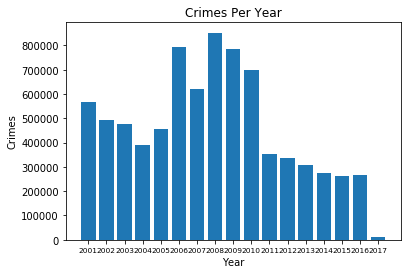

In [19]:
filterCrimes = cleaned_crimes[cleaned_crimes['Year'] > 2000]
filterCrimes = filterCrimes.groupby('Year').count()

filterCrimes.index.name = 'Year'
filterCrimes.reset_index(inplace=True)
plt.title("Crimes Per Year")
plt.xlabel("Year")
plt.ylabel("Crimes")
plt.xticks(filterCrimes['Year'],fontsize=7.5)
plt.bar(filterCrimes['Year'],filterCrimes['ID'])

<BarContainer object of 17 artists>

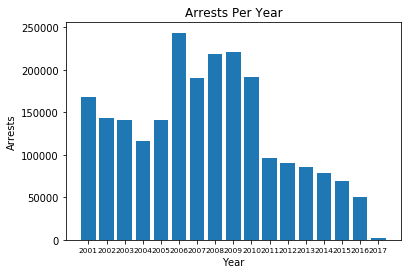

In [20]:
filterArrest = cleaned_crimes[(cleaned_crimes['Arrest']) == True & (cleaned_crimes['Year'] > 2000)]
filterArrest = filterArrest.groupby('Year').sum()

filterArrest.index.name = 'Year'
filterArrest.reset_index(inplace=True)
plt.title("Arrests Per Year")
plt.xlabel("Year")
plt.ylabel("Arrests")
plt.xticks(filterArrest['Year'],fontsize=7.5)
plt.bar(filterArrest['Year'],filterArrest['Arrest'])

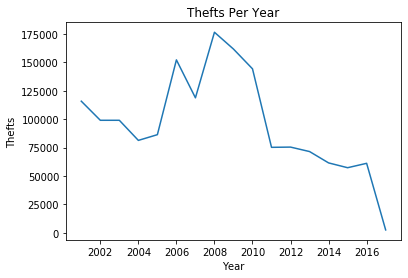

In [21]:
filterTheft = cleaned_crimes[(cleaned_crimes['Primary Type'] == "THEFT") & (cleaned_crimes['Year'] > 2000)]
filterTheft = filterTheft.groupby('Year').size().to_frame('Count').reset_index()
plt.title("Thefts Per Year")
plt.xlabel("Year")
plt.ylabel("Thefts")
plt.plot(filterTheft['Year'],filterTheft['Count'])

<h1>Final Linear Regressions</h1>

<h2>Crimes Per Month</h2>

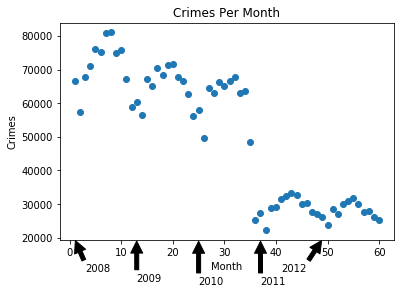

In [22]:
filterMonthCrime1 = cleaned_crimes[(cleaned_crimes['Year'] == 2008)]
filterMonthCrime1 = filterMonthCrime1.groupby(['Month']).count()

filterMonthCrime2 = cleaned_crimes[(cleaned_crimes['Year'] == 2009)]
filterMonthCrime2 = filterMonthCrime2.groupby(['Month']).count()

filterMonthCrime3 = cleaned_crimes[(cleaned_crimes['Year'] == 2010)]
filterMonthCrime3 = filterMonthCrime3.groupby(['Month']).count()

filterMonthCrime4 = cleaned_crimes[(cleaned_crimes['Year'] == 2011)]
filterMonthCrime4 = filterMonthCrime4.groupby(['Month']).count()

filterMonthCrime5 = cleaned_crimes[(cleaned_crimes['Year'] == 2012)]
filterMonthCrime5 = filterMonthCrime5.groupby(['Month']).count()

allMonthCrime = [filterMonthCrime1,filterMonthCrime2,filterMonthCrime3,filterMonthCrime4,filterMonthCrime5]
allMonthCrimes = pd.concat(allMonthCrime)
allMonthCrimes.reset_index(inplace=True)
allMonthCrimes.index = np.arange(1, len(allMonthCrimes)+1)
allMonthCrimes['index1'] = allMonthCrimes.index
plt.title("Crimes Per Month")
plt.xlabel("Month")
plt.ylabel("Crimes")

plt.annotate('2008', xy=(1, 19500), xytext=(3, 10000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2009', xy=(13, 19500), xytext=(13, 7000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2010', xy=(25, 19500), xytext=(25, 6000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2011', xy=(37, 19500), xytext=(37, 6000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2012', xy=(49, 19500), xytext=(41, 10000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.scatter(allMonthCrimes['index1'],allMonthCrimes['ID'])

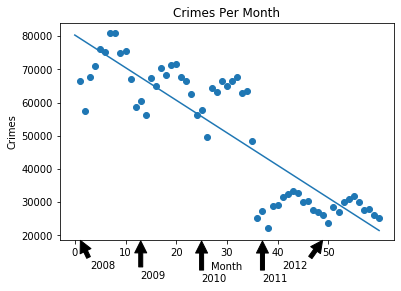

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(allMonthCrimes['index1'][:,np.newaxis],allMonthCrimes['ID'])
xfit = np.linspace(0,60)
yfit = model.predict(xfit[:,np.newaxis])

plt.scatter(allMonthCrimes['index1'],allMonthCrimes['ID'])
plt.xticks(np.arange(0,60,10))
plt.title("Crimes Per Month")
plt.xlabel("Month")
plt.ylabel("Crimes")

plt.annotate('2008', xy=(1, 18800), xytext=(3, 10000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2009', xy=(13, 18800), xytext=(13, 7000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2010', xy=(25, 18800), xytext=(25, 6000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2011', xy=(37, 18800), xytext=(37, 6000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2012', xy=(49, 18800), xytext=(41, 10000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot(xfit,yfit)

In [24]:
from sklearn.model_selection import train_test_split

X = allMonthCrimes['index1'].values.reshape(-1,1)
y = allMonthCrimes['ID'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)

print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [[-981.67172571]]
lr.intercept_: [80036.20973578]
Training set score: 0.78
Test set score: 0.74


In [25]:
print('Model slope: ', model.coef_[0])
print('Model intercept: ', model.intercept_)

Model slope:  -981.4671853292582
Model intercept:  80341.08248587571


<b>Model Evaluation</b>

In [26]:
from sklearn import metrics
y_predlr = lr.predict(X_test)
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_predlr))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_predlr))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_predlr)))

Mean Absolute Error:  8426.94137662342
Mean Squared Error:  99699583.61894862
Root Mean Squared Error:  9984.967882719935


In [27]:
from sklearn.metrics import r2_score
print("R^2: ", r2_score(y_test, y_predlr))

R^2:  0.7374626836020501


<h2>Arrests Per Month</h2>

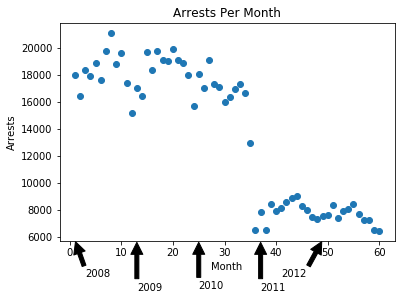

In [28]:
monthArrests = cleaned_crimes[(cleaned_crimes['Arrest']) == True & (cleaned_crimes['Year'] > 2000)]

filterMonthArrest1 = monthArrests[monthArrests['Year'] == 2008]
filterMonthArrest1 = filterMonthArrest1.groupby(['Month']).count()

filterMonthArrest2 = monthArrests[monthArrests['Year'] == 2009]
filterMonthArrest2 = filterMonthArrest2.groupby(['Month']).count()

filterMonthArrest3 = monthArrests[monthArrests['Year'] == 2010]
filterMonthArrest3 = filterMonthArrest3.groupby(['Month']).count()

filterMonthArrest4 = monthArrests[monthArrests['Year'] == 2011]
filterMonthArrest4 = filterMonthArrest4.groupby(['Month']).count()

filterMonthArrest5 = monthArrests[monthArrests['Year'] == 2012]
filterMonthArrest5 = filterMonthArrest5.groupby(['Month']).count()

allMonthArrest = [filterMonthArrest1,filterMonthArrest2,filterMonthArrest3,filterMonthArrest4,filterMonthArrest5]
allMonthArrests = pd.concat(allMonthArrest)
allMonthArrests.reset_index(inplace=True)
allMonthArrests.index = np.arange(1, len(allMonthArrests)+1)
allMonthArrests['index1'] = allMonthArrests.index
plt.title("Arrests Per Month")
plt.xlabel("Month")
plt.ylabel("Arrests")

plt.annotate('2008', xy=(1, 5750), xytext=(3, 3000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2009', xy=(13, 5750), xytext=(13, 2000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2010', xy=(25, 5750), xytext=(25, 2100),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2011', xy=(37, 5750), xytext=(37, 2000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2012', xy=(49, 5750), xytext=(41, 3000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.scatter(allMonthArrests['index1'],allMonthArrests['ID'])

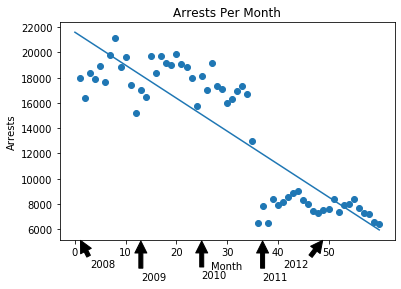

In [29]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(allMonthArrests['index1'][:,np.newaxis],allMonthArrests['ID'])
xfit2 = np.linspace(0,60)
yfit2 = model2.predict(xfit2[:,np.newaxis])

plt.scatter(allMonthArrests['index1'],allMonthArrests['ID'])
plt.xticks(np.arange(0,60,10))
plt.title("Arrests Per Month")
plt.xlabel("Month")
plt.ylabel("Arrests")
plt.annotate('2008', xy=(1, 5200), xytext=(3, 3000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2009', xy=(13, 5200), xytext=(13, 2000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2010', xy=(25, 5200), xytext=(25, 2100),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2011', xy=(37, 5200), xytext=(37, 2000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2012', xy=(49, 5200), xytext=(41, 3000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot(xfit2,yfit2)

In [30]:
from sklearn.model_selection import train_test_split

X2 = allMonthArrests['index1'].values.reshape(-1,1)
y2 = allMonthArrests['ID'].values.reshape(-1,1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=0)
lr2 = LinearRegression()
lr2.fit(X_train2, y_train2)

print("lr.coef_:", lr2.coef_)
print("lr.intercept_:", lr2.intercept_)

print("Training set score: {:.2f}".format(lr2.score(X_train2, y_train2)))
print("Test set score: {:.2f}".format(lr2.score(X_test2, y_test2)))


lr.coef_: [[-263.73853492]]
lr.intercept_: [21714.69820716]
Training set score: 0.78
Test set score: 0.72


In [31]:
print('Model slope: ', model2.coef_[0])
print('Model intercept: ', model2.intercept_)

Model slope:  -260.77413170325104
Model intercept:  21595.49435028249


<b>Model Evaluation</b>

In [32]:
from sklearn import metrics
y_predlr2 = lr2.predict(X_test2)
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test2, y_predlr2))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test2, y_predlr2))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test2, y_predlr2)))

Mean Absolute Error:  2273.821620287991
Mean Squared Error:  7236164.244460577
Root Mean Squared Error:  2690.011941323045


In [33]:
from sklearn.metrics import r2_score
print("R^2: ", r2_score(y_test2, y_predlr2))

R^2:  0.7214028948305319


<h1>Initial Linear Regressions</h1>

<h2>Crimes Per Year</h2>

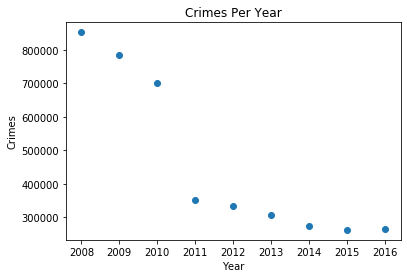

In [34]:
filterYearCrimes = cleaned_crimes[(cleaned_crimes['Year'] > 2007) & (cleaned_crimes['Year'] < 2017)]
filterYearCrimes = filterYearCrimes.groupby(['Year']).count()
filterYearCrimes.reset_index(inplace=True)
plt.title("Crimes Per Year")
plt.xlabel("Year")
plt.ylabel("Crimes")
plt.scatter(filterYearCrimes['Year'],filterYearCrimes['ID'])

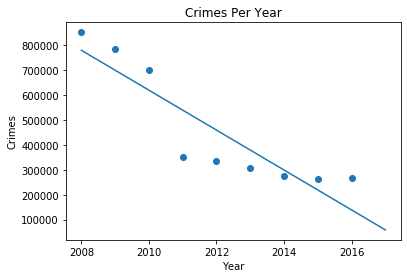

In [35]:
model3 = LinearRegression()
model3.fit(filterYearCrimes['Year'][:,np.newaxis],filterYearCrimes['ID'])
xfit3 = np.linspace(2008,2017)
yfit3 = model3.predict(xfit3[:,np.newaxis])

plt.scatter(filterYearCrimes['Year'],filterYearCrimes['ID'])
plt.xticks(np.arange(2008, 2017, 2))
plt.title("Crimes Per Year")
plt.xlabel("Year")
plt.ylabel("Crimes")
plt.plot(xfit3,yfit3)

In [36]:
X3 = filterYearCrimes['Year'].values.reshape(-1,1)
y3 = filterYearCrimes['ID'].values.reshape(-1,1)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=0)
lr3 = LinearRegression()
lr3.fit(X_train3, y_train3)

print("lr.coef_:", lr3.coef_)
print("lr.intercept_:", lr3.intercept_ + lr3.coef_ * 2008)

print("Training set score: {:.2f}".format(lr3.score(X_train3, y_train3)))
print("Test set score: {:.2f}".format(lr3.score(X_test3, y_test3)))

lr.coef_: [[-70665.17857143]]
lr.intercept_: [[703962.60714287]]
Training set score: 0.74
Test set score: 0.72


In [37]:
print('Model slope: ', model3.coef_[0])
print('Model intercept: ', model3.intercept_ + model3.coef_[0]*2008)

Model slope:  -80112.83333333334
Model intercept:  779792.1111111343


<b>Model Evaluation</b>

In [38]:
from sklearn import metrics
y_predlr3 = lr3.predict(X_test3)
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test3, y_predlr3))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test3, y_predlr3))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test3, y_predlr3)))

Mean Absolute Error:  114116.65476189058
Mean Squared Error:  14874607781.430624
Root Mean Squared Error:  121961.50122653716


In [39]:
from sklearn.metrics import r2_score
print("R^2: ", r2_score(y_test3, y_predlr3))

R^2:  0.7150722375080956


<h2>Arrests Per Year</h2>

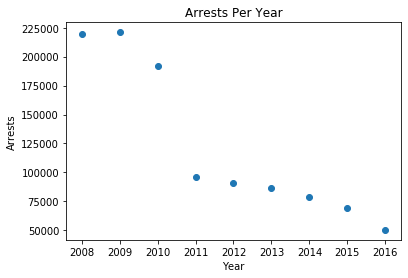

In [40]:
filterYearArrests = cleaned_crimes[(cleaned_crimes['Arrest'] == True)
                                   & (cleaned_crimes['Year'] > 2007) &
                                   (cleaned_crimes['Year'] < 2017)]
plt.title("Arrests Per Year")
plt.xlabel("Year")
plt.ylabel("Arrests")
filterYearArrests = filterYearArrests.groupby(['Year']).count()
filterYearArrests.reset_index(inplace=True)
plt.scatter(filterYearArrests['Year'],filterYearArrests['ID'])

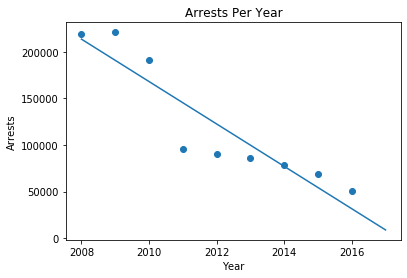

In [41]:
model4 = LinearRegression()
model4.fit(filterYearArrests['Year'][:,np.newaxis],filterYearArrests['ID'])
xfit4 = np.linspace(2008,2017)
yfit4 = model4.predict(xfit4[:,np.newaxis])

plt.scatter(filterYearArrests['Year'],filterYearArrests['ID'])
plt.xticks(np.arange(2008, 2017, 2))
plt.title("Arrests Per Year")
plt.xlabel("Year")
plt.ylabel("Arrests")
plt.plot(xfit4,yfit4)

In [42]:
X4 = filterYearArrests['Year'].values.reshape(-1,1)
y4 = filterYearArrests['ID'].values.reshape(-1,1)

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.3, random_state=3)
lr4 = LinearRegression()
lr4.fit(X_train4, y_train4)

print("lr.coef_:", lr4.coef_)
print("lr.intercept_:", lr4.intercept_ + lr4.coef_ * 2008)

print("Training set score: {:.2f}".format(lr4.score(X_train4, y_train4)))
print("Test set score: {:.2f}".format(lr4.score(X_test4, y_test4)))

lr.coef_: [[-23293.93975904]]
lr.intercept_: [[208797.95582329]]
Training set score: 0.83
Test set score: 0.84


In [43]:
print('Model slope: ', model4.coef_[0])
print('Model intercept: ', model4.intercept_ + model4.coef_[0]*2008)

Model slope:  -22753.450000000008
Model intercept:  213632.91111110896


<b>Model Evaluation</b>

In [44]:
from sklearn import metrics
y_predlr4 = lr4.predict(X_test4)
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test4, y_predlr4))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test4, y_predlr4))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test4, y_predlr4)))

Mean Absolute Error:  20990.74297189216
Mean Squared Error:  506055111.78198284
Root Mean Squared Error:  22495.668733824805


In [45]:
from sklearn.metrics import r2_score
print("R^2: ", r2_score(y_test4, y_predlr4))

R^2:  0.8352643102470608
